# In this notebook, we present the some common and widely used methods for imbalanced data in machine learning.
> Reference: https://www.kaggle.com/code/zeyadusf/imbalance-treatment-techniques-in-machine-learning#Imbalanced-Data

In [1]:
import pandas as pd
import numpy as np
#
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#
from imblearn.under_sampling import TomekLinks , RandomUnderSampler
from imblearn.over_sampling import SMOTE ,RandomOverSampler
from imblearn.combine import SMOTETomek
#
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier


#
from sklearn import metrics
#
import warnings
warnings.filterwarnings('ignore')

In [2]:
path='../data/heart_2022_with_nans.csv'

In [3]:
# read data
df = pd.read_csv(path ,sep=',',encoding='utf-8')
df.sample(5)

State     Sex GeneralHealth  PhysicalHealthDays  \
160881    Maryland  Female          Good                 0.0   
296152        Ohio    Male     Very good                 1.0   
392485  Washington    Male          Good                 0.0   
82365      Georgia  Female          Good                 NaN   
6470        Alaska  Female     Very good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
160881               1.0  Within past year (anytime less than 12 months ...   
296152               1.0                                5 or more years ago   
392485               0.0  Within past year (anytime less than 12 months ...   
82365                NaN                                                NaN   
6470                 0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours  RemovedTeeth HadHeartAttack  ...  \
160881                Yes         8.0  None of them             No  ...   
296152                Yes         8.0        1 to 5             No  ...   
392485                Yes         8.0        1 to 5             No  ...   
82365                 Yes         9.0  None of them             No  ...   
6470                  Yes         8.0  None of them             No  ...   

       HeightInMeters WeightInKilograms    BMI AlcoholDrinkers HIVTesting  \
160881           1.63             74.84  28.32             Yes         No   
296152           1.78             83.91  26.54             Yes         No   
392485           1.75             77.11  25.10             Yes         No   
82365            1.63             74.84  28.32             Yes         No   
6470             1.68             77.11  27.44              No        Yes   

       FluVaxLast12 PneumoVaxEver  \
160881          Yes           Yes   
296152           No            No   
392485          Yes           Yes   
82365            No           NaN   
6470            Yes           Yes   

                                        TetanusLast10Tdap HighRiskLastYear  \
160881  Yes, received tetanus shot but not sure what type               No   
296152  No, did not receive any tetanus shot in the pa...               No   
392485                                 Yes, received Tdap               No   
82365   Yes, received tetanus shot but not sure what type               No   
6470    Yes, received tetanus shot but not sure what type               No   

       CovidPos  
160881       No  
296152       No  
392485       No  
82365       Yes  
6470        Yes  

[5 rows x 40 columns]

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [5]:
df.describe().T

count       mean        std    min    25%    50%  \
PhysicalHealthDays  434205.0   4.347919   8.688912   0.00   0.00   0.00   
MentalHealthDays    436065.0   4.382649   8.387475   0.00   0.00   0.00   
SleepHours          439679.0   7.022983   1.502425   1.00   6.00   7.00   
HeightInMeters      416480.0   1.702691   0.107177   0.91   1.63   1.70   
WeightInKilograms   403054.0  83.074470  21.448173  22.68  68.04  80.74   
BMI                 396326.0  28.529842   6.554889  12.02  24.13  27.44   

                      75%     max  
PhysicalHealthDays   3.00   30.00  
MentalHealthDays     5.00   30.00  
SleepHours           8.00   24.00  
HeightInMeters       1.78    2.41  
WeightInKilograms   95.25  292.57  
BMI                 31.75   99.64

#### Missing Value Cleaning

In [6]:
import sys
sys.path.append('..')  

# Step 2: Import your function
from src.clean_data import clean_data

# Step 3: Use the function
input_path = '../data/heart_2022_with_nans.csv'
output_path = '../data/heart_2022_cleaned.csv'

clean_data(input_path, output_path, target_column="HadHeartAttack")

Loading data...
Columns before processing: ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Handling missing values...
Dropping rows where 'HadHeartAttack' is NaN...
Dropped 3065 rows.
Missing values after processing:
State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           

In [7]:
new_path = '../data/heart_2022_cleaned.csv'
df = pd.read_csv(new_path ,sep=',',encoding='utf-8')

#### Features Distribution

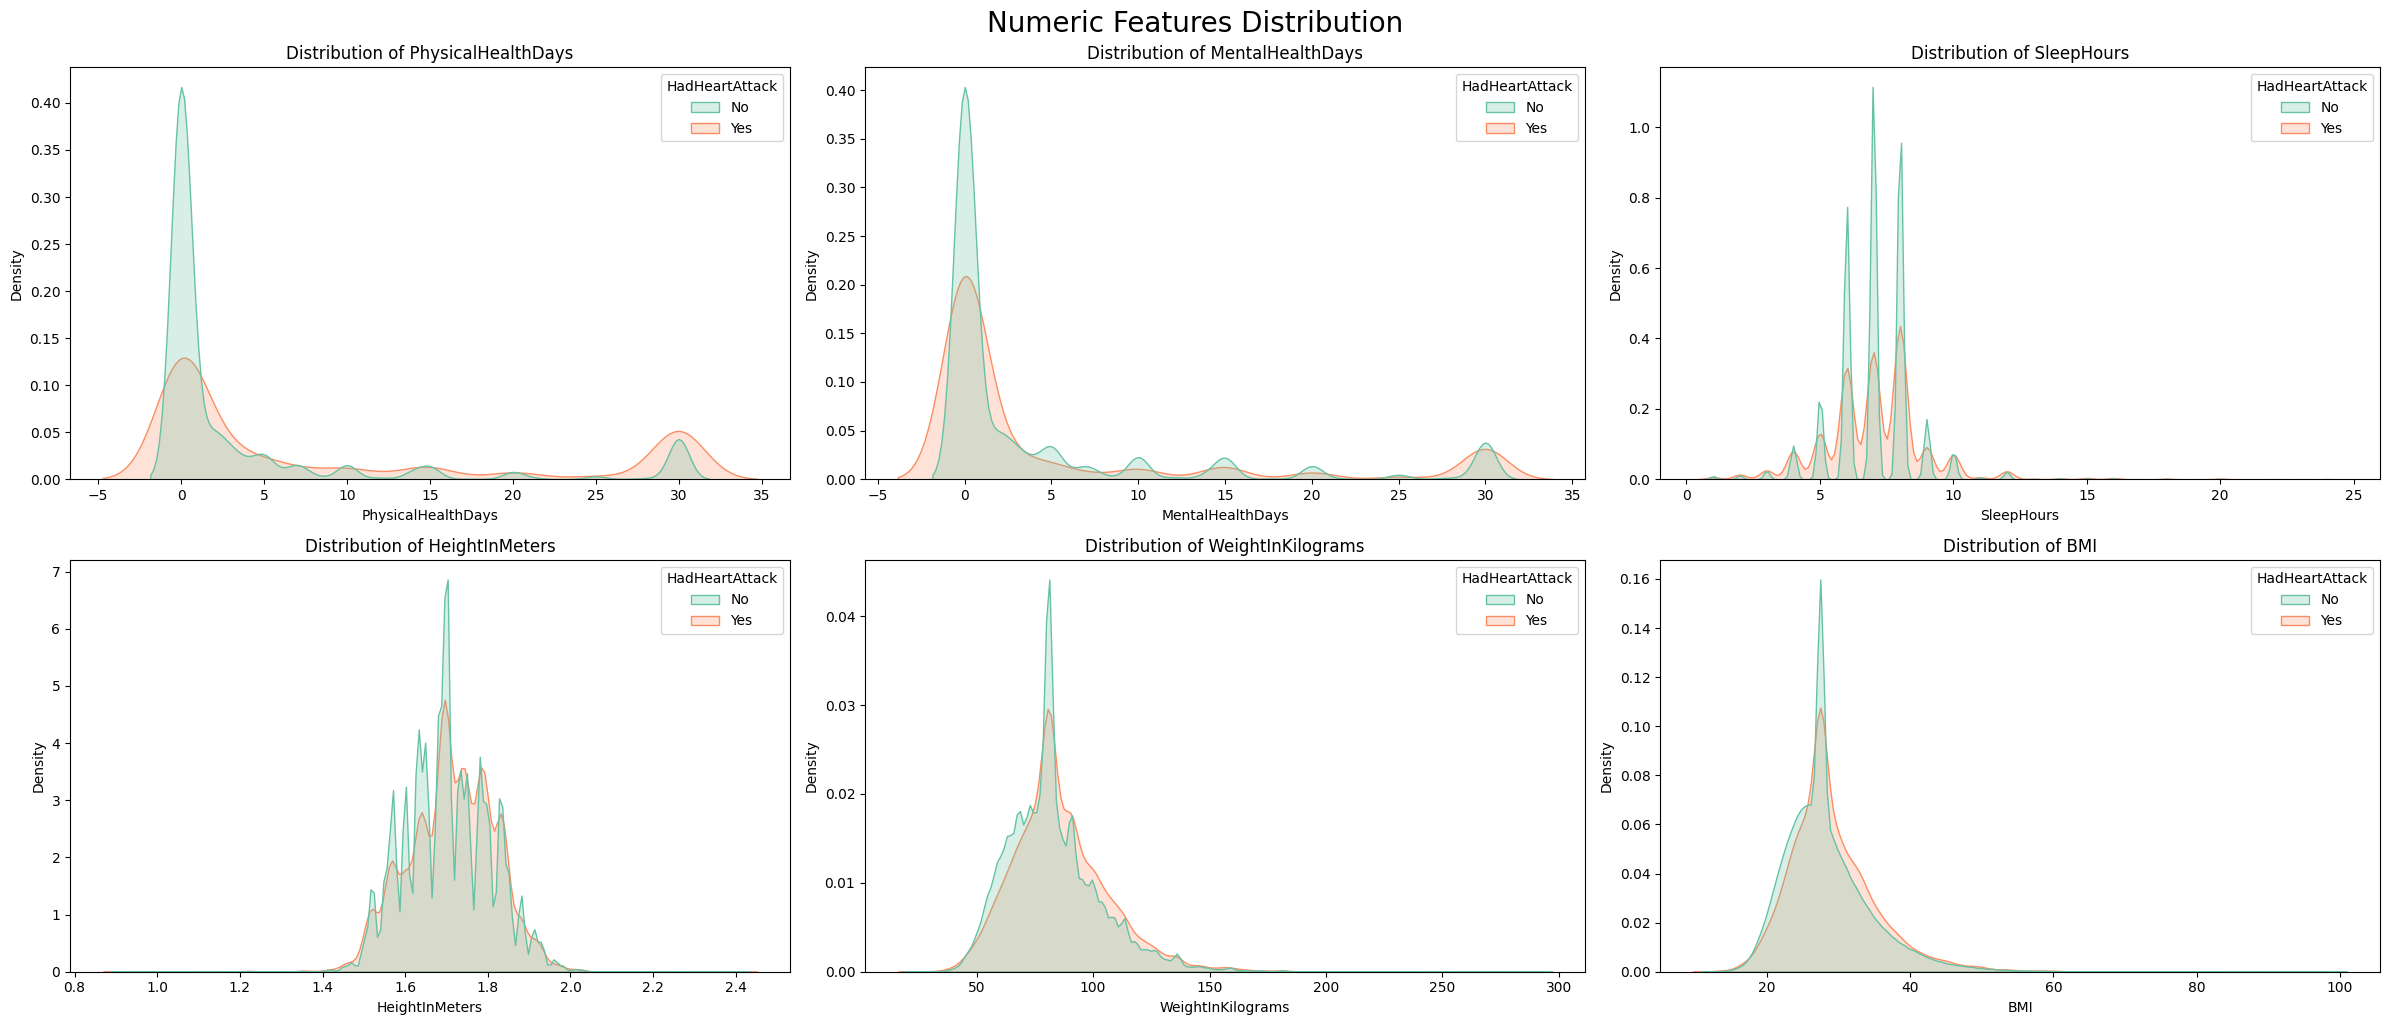

In [8]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 5 * n_rows))
axes = axes.flatten()
plt.title('Numeric Features Distribution', fontsize=20, y=1.02)
for idx, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, hue='HadHeartAttack', fill=True, common_norm=False, palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Numeric Features Distribution', fontsize=20, y=1.02)
plt.show()


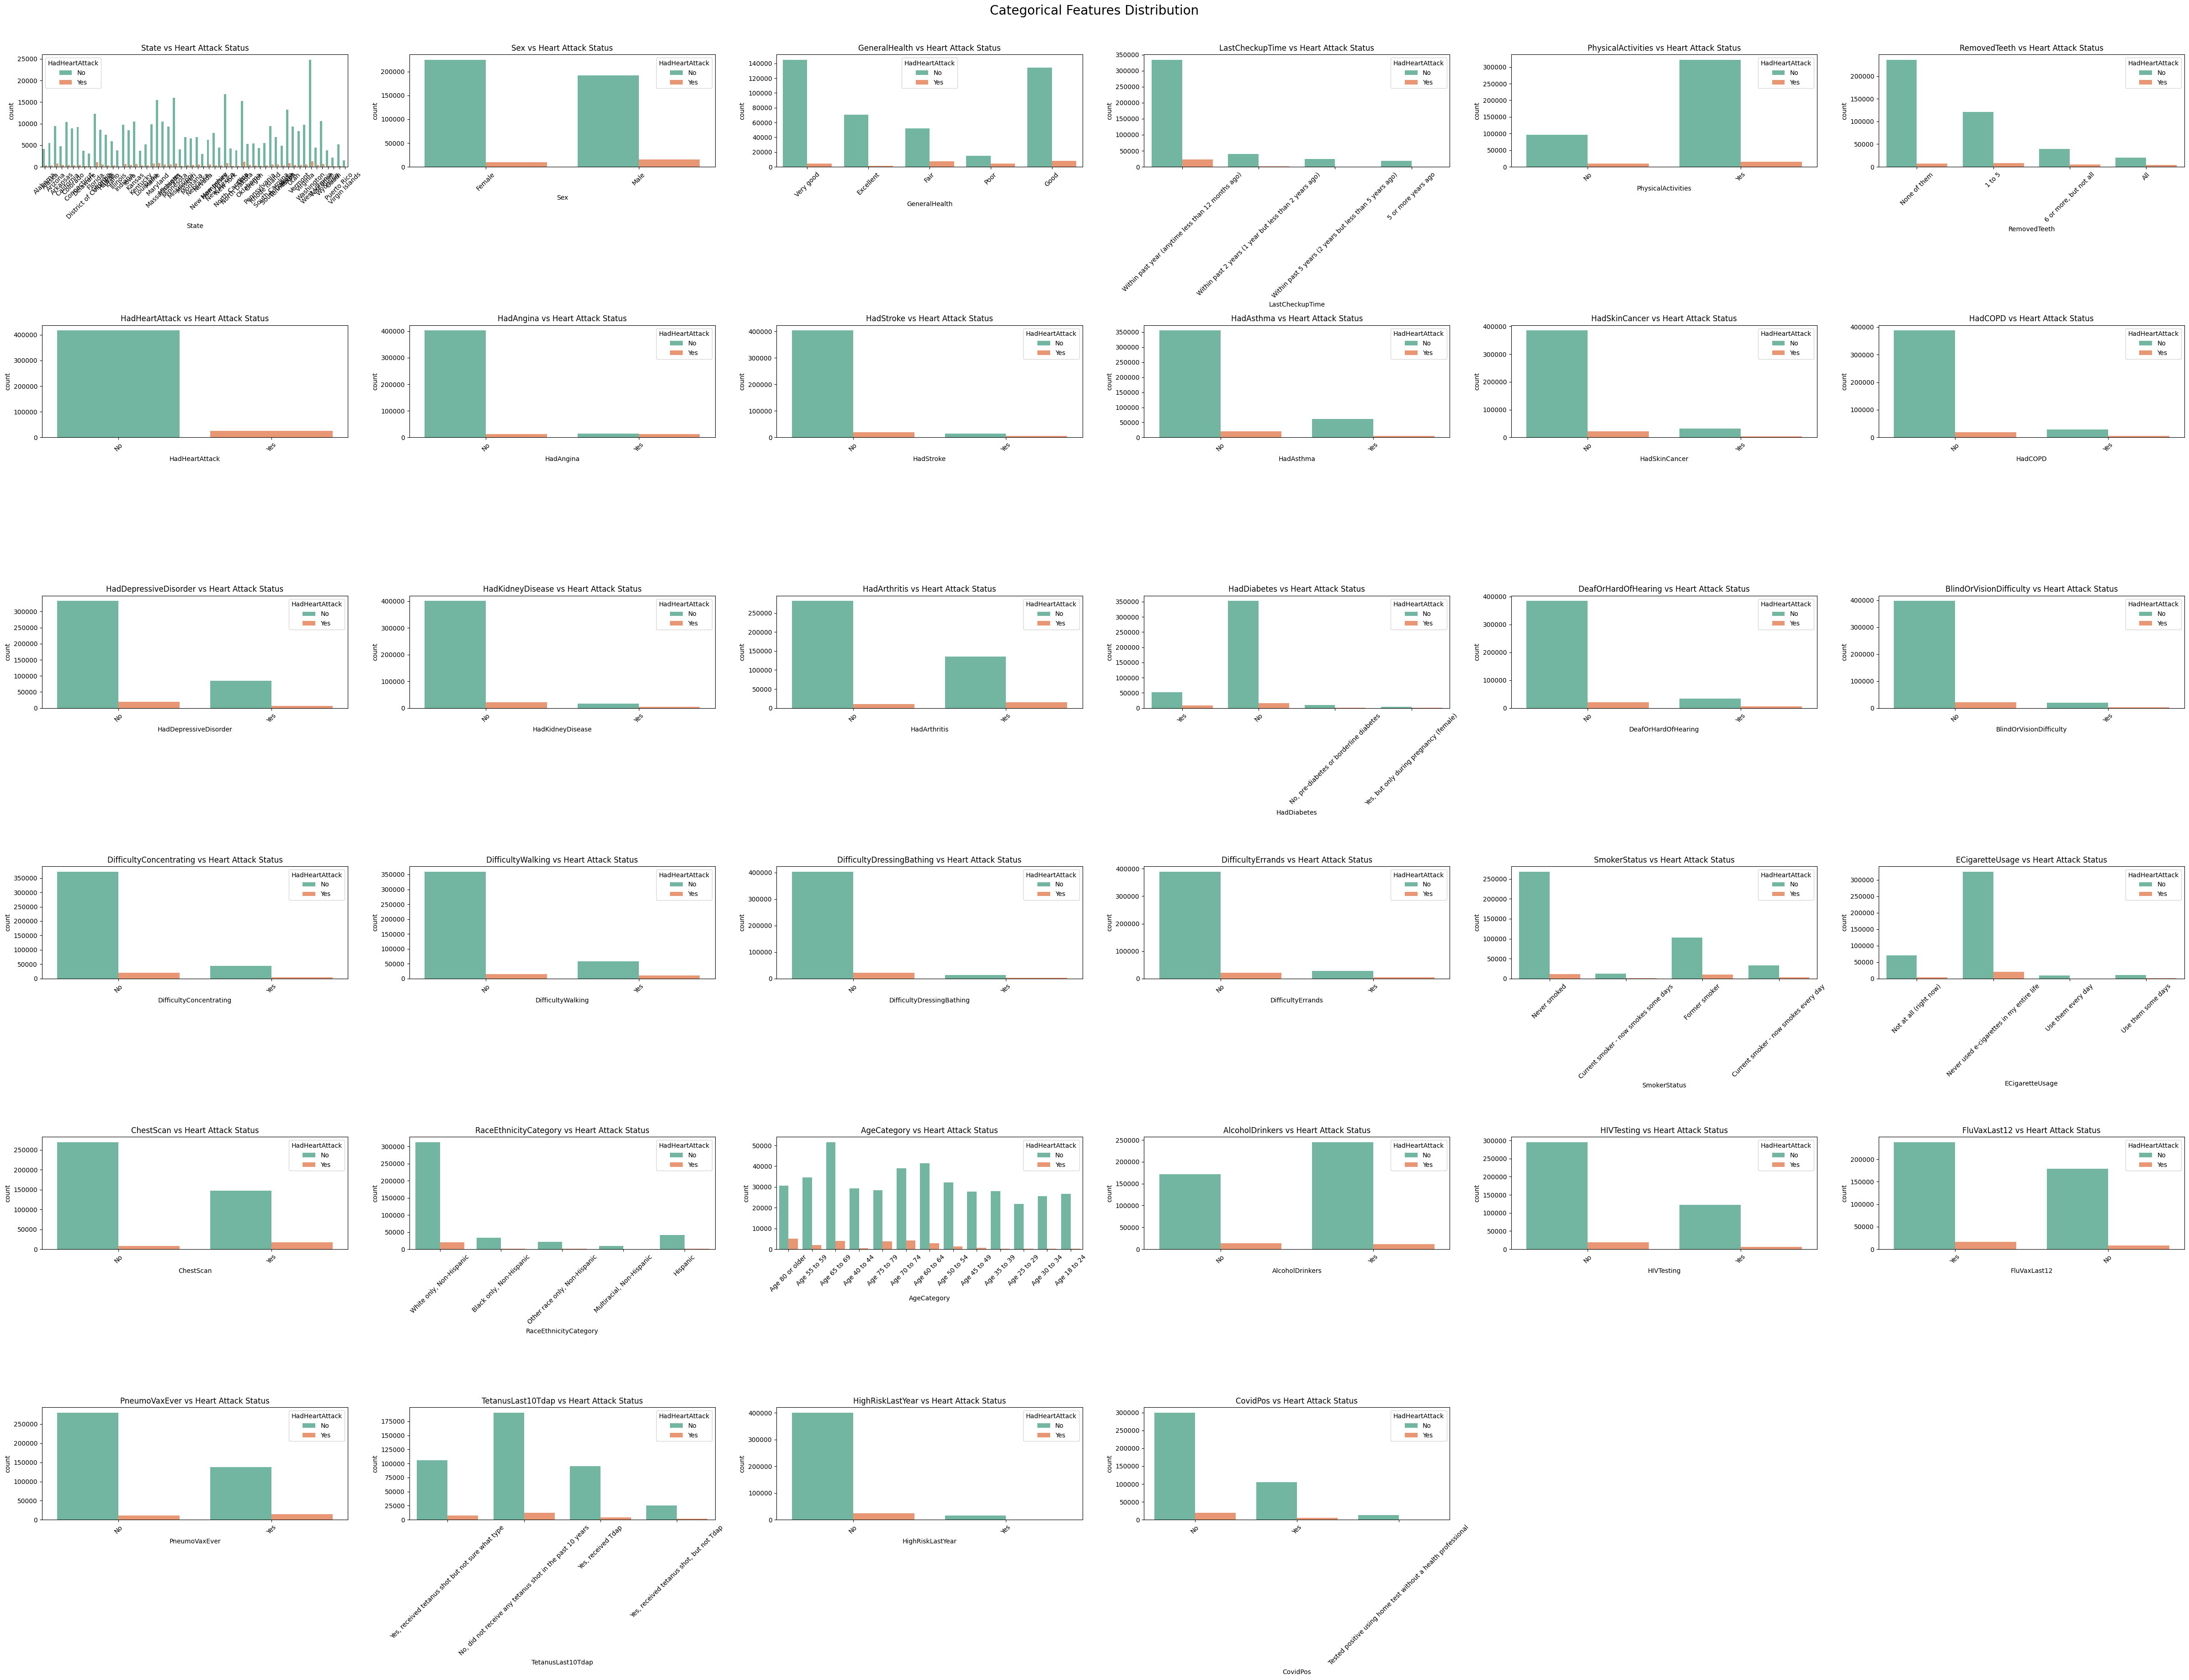

In [9]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

n_cols = 6
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    sns.countplot(data=df, x=col, hue='HadHeartAttack', palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'{col} vs Heart Attack Status')
    axes[idx].tick_params(axis='x', rotation=45)


for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Categorical Features Distribution', fontsize=20, y=1.02)
plt.show()


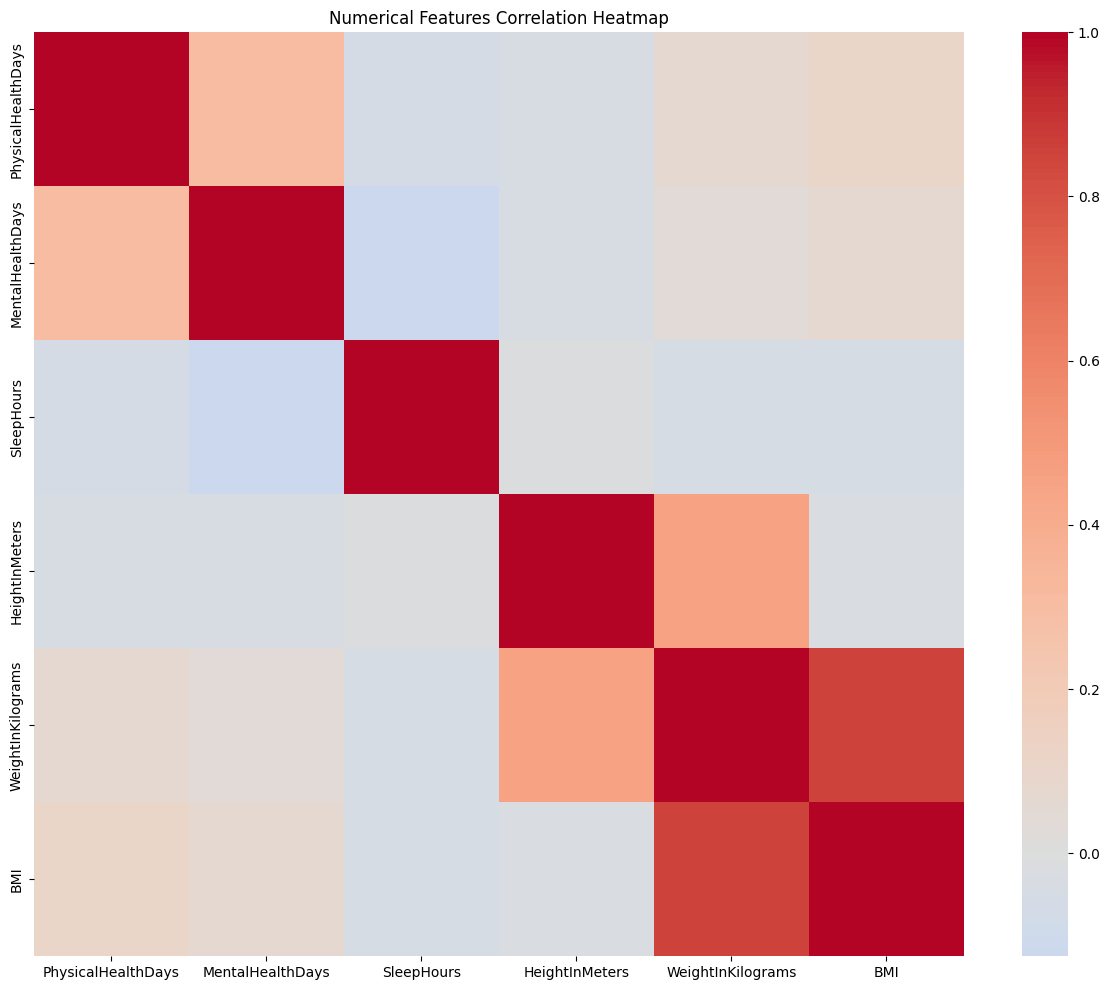

In [10]:
plt.figure(figsize=(15,12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

In [11]:
df.describe(include='object').T


count unique  \
State                      442067     54   
Sex                        442067      2   
GeneralHealth              442067      5   
LastCheckupTime            442067      4   
PhysicalActivities         442067      2   
RemovedTeeth               442067      4   
HadHeartAttack             442067      2   
HadAngina                  442067      2   
HadStroke                  442067      2   
HadAsthma                  442067      2   
HadSkinCancer              442067      2   
HadCOPD                    442067      2   
HadDepressiveDisorder      442067      2   
HadKidneyDisease           442067      2   
HadArthritis               442067      2   
HadDiabetes                442067      4   
DeafOrHardOfHearing        442067      2   
BlindOrVisionDifficulty    442067      2   
DifficultyConcentrating    442067      2   
DifficultyWalking          442067      2   
DifficultyDressingBathing  442067      2   
DifficultyErrands          442067      2   
SmokerStatus               442067      4   
ECigaretteUsage            442067      4   
ChestScan                  442067      2   
RaceEthnicityCategory      442067      5   
AgeCategory                442067     13   
AlcoholDrinkers            442067      2   
HIVTesting                 442067      2   
FluVaxLast12               442067      2   
PneumoVaxEver              442067      2   
TetanusLast10Tdap          442067      4   
HighRiskLastYear           442067      2   
CovidPos                   442067      3   

                                                                         top  \
State                                                             Washington   
Sex                                                                   Female   
GeneralHealth                                                      Very good   
LastCheckupTime            Within past year (anytime less than 12 months ...   
PhysicalActivities                                                       Yes   
RemovedTeeth                                                    None of them   
HadHeartAttack                                                            No   
HadAngina                                                                 No   
HadStroke                                                                 No   
HadAsthma                                                                 No   
HadSkinCancer                                                             No   
HadCOPD                                                                   No   
HadDepressiveDisorder                                                     No   
HadKidneyDisease                                                          No   
HadArthritis                                                              No   
HadDiabetes                                                               No   
DeafOrHardOfHearing                                                       No   
BlindOrVisionDifficulty                                                   No   
DifficultyConcentrating                                                   No   
DifficultyWalking                                                         No   
DifficultyDressingBathing                                                 No   
DifficultyErrands                                                         No   
SmokerStatus                                                    Never smoked   
ECigaretteUsage                    Never used e-cigarettes in my entire life   
ChestScan                                                                 No   
RaceEthnicityCategory                               White only, Non-Hispanic   
AgeCategory                                                     Age 65 to 69   
AlcoholDrinkers                                                          Yes   
HIVTesting                                                                No   
FluVaxLast12                                                             Yes   
PneumoV

## Binning
> Binning some numerical features for better insights

In [12]:
bins = [0, 18.5, 25, 30, 35, np.inf]
labels = ['Underweight', 'Normal weight',
          'Overweight', 'Obese', 'Extremly Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins, labels=labels)
# df.drop('BMI', axis=1, inplace=True)

df["BMI_Category"].value_counts()


Overweight        187196
Normal weight     116836
Obese              76755
Extremly Obese     54575
Underweight         6705
Name: BMI_Category, dtype: int64

In [13]:
sleep_bins = [0, 4, 6, 8, 10, np.inf]
sleep_labels = ['Very Short Sleep', 'Short Sleep', 'Normal Sleep', 'Long Sleep', 'Very Long Sleep']

# 用 pd.cut 做分類
df['SleepHours_Category'] = pd.cut(df['SleepHours'], bins=sleep_bins, labels=sleep_labels)

# 檢查分類結果
print(df['SleepHours_Category'].value_counts())


Normal Sleep        262203
Short Sleep         125183
Long Sleep           31409
Very Short Sleep     18119
Very Long Sleep       5153
Name: SleepHours_Category, dtype: int64


# EDA

In [14]:
fig = go.Figure(data=[go.Pie(labels=df['HadHeartAttack'], pull=[0.2, 0.2, 0.2])])
fig.show()


> Only there are 5.68% patients that have heart disease


#### Some 2 combined features may have better significance

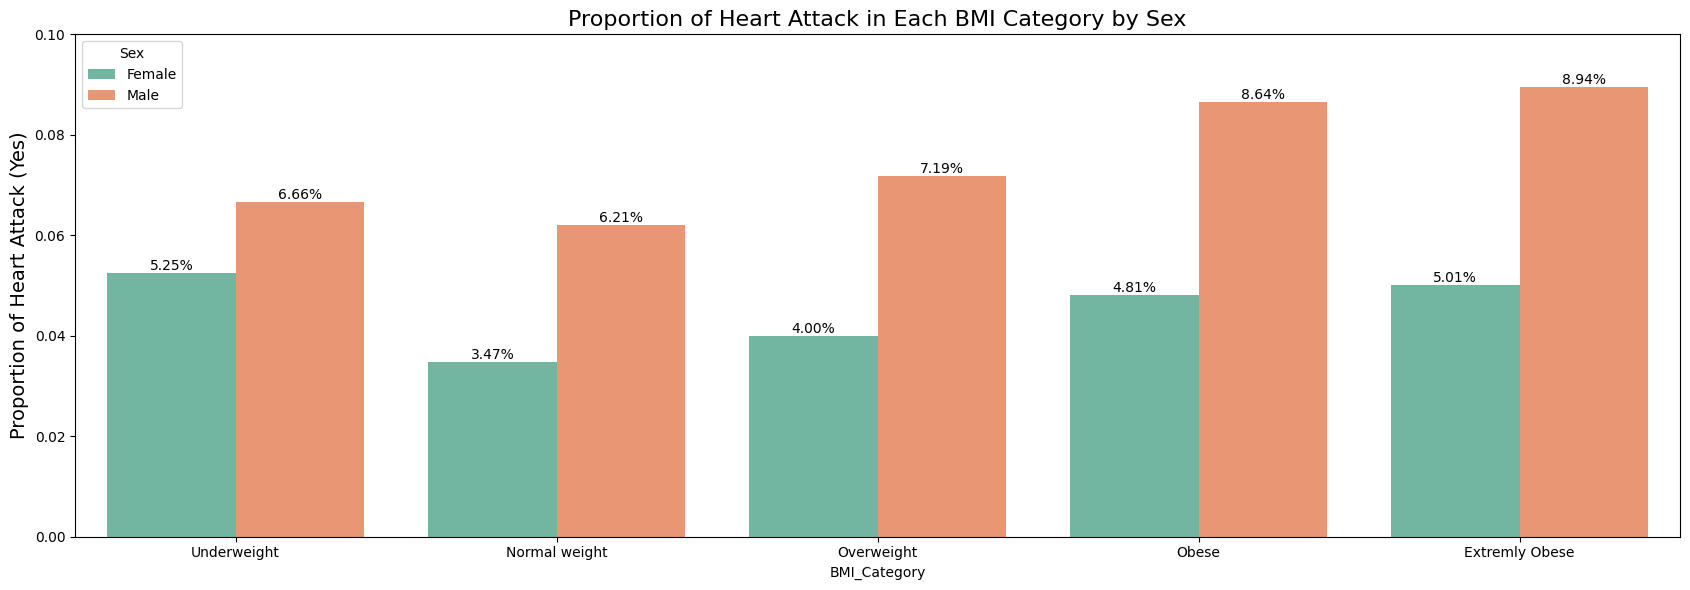

In [15]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='BMI_Category',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each BMI Category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### The age of patients ?

In [16]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='AgeCategory',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Age Category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.25) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### How many patients that have heart disease are smoking ?

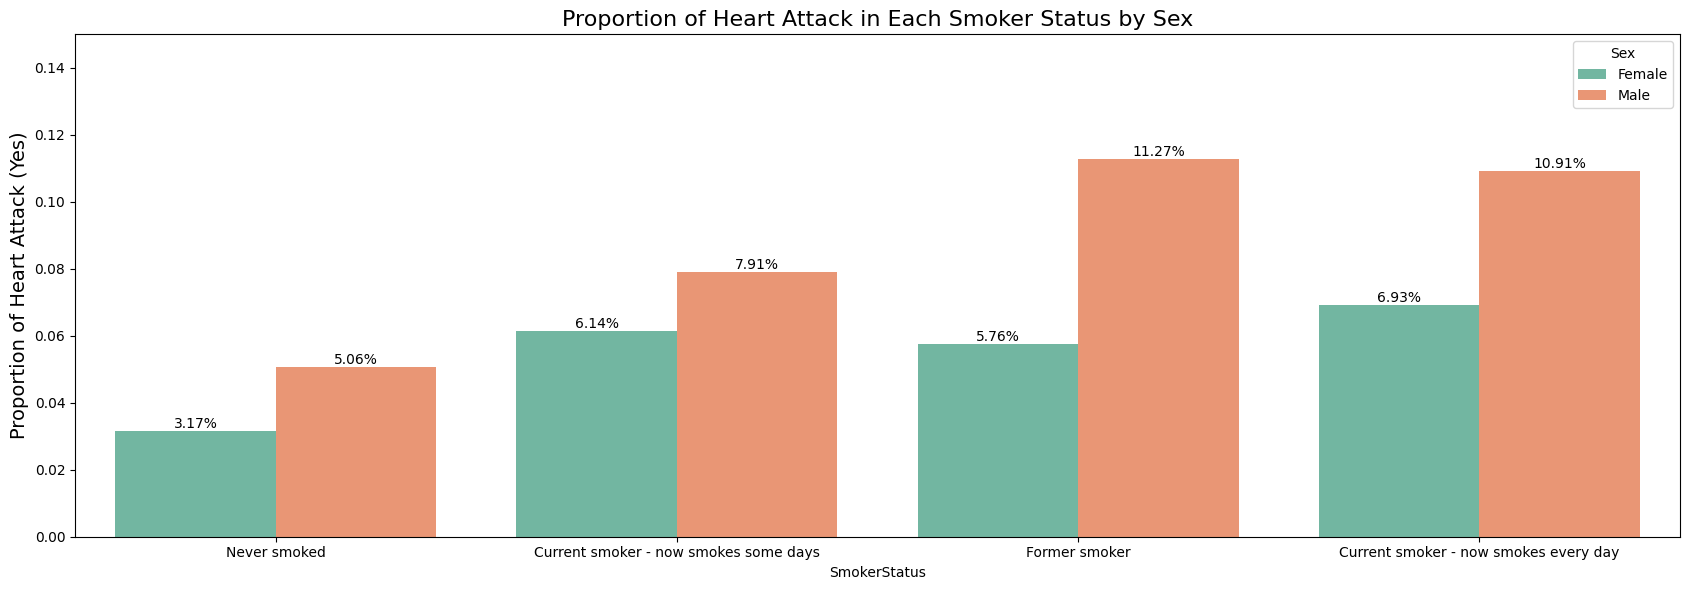

In [17]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='SmokerStatus',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Smoker Status by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.15) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

#### Sleep vs Heart Disease

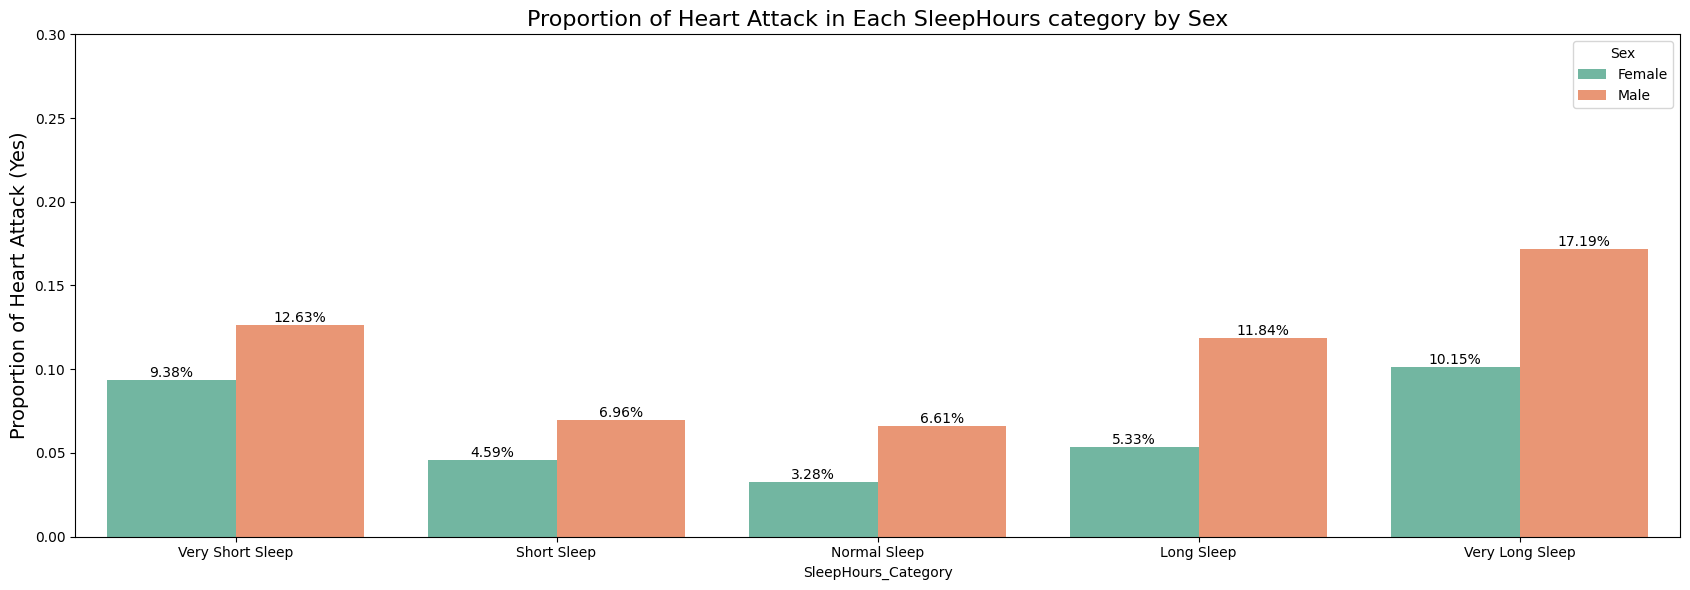

In [18]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='SleepHours_Category',
    y='HeartAttackBinary',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each SleepHours category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.3) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

#### Checkup time with Astham

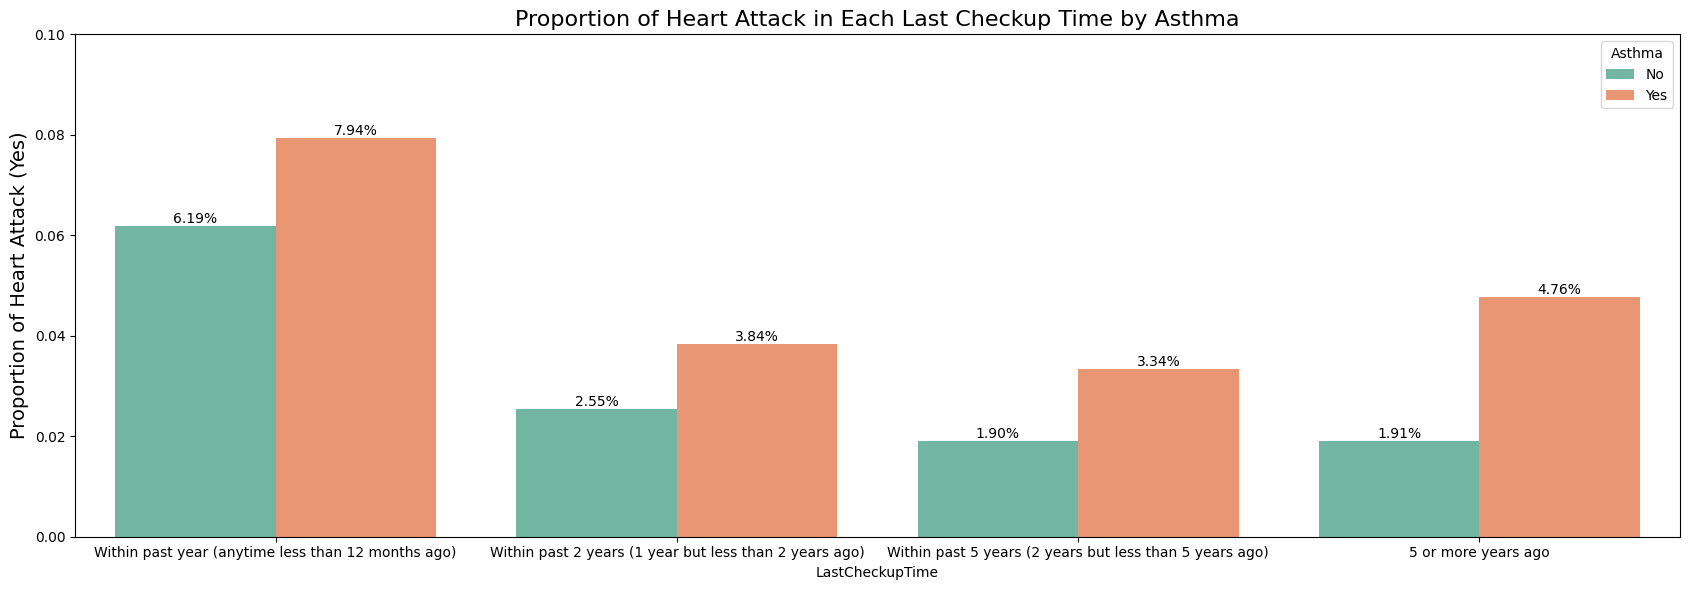

In [19]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='LastCheckupTime',
    y='HeartAttackBinary',
    hue='HadAsthma',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Last Checkup Time by Asthma', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Asthma')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

#### ECigarette and Dinking habits with heart disease

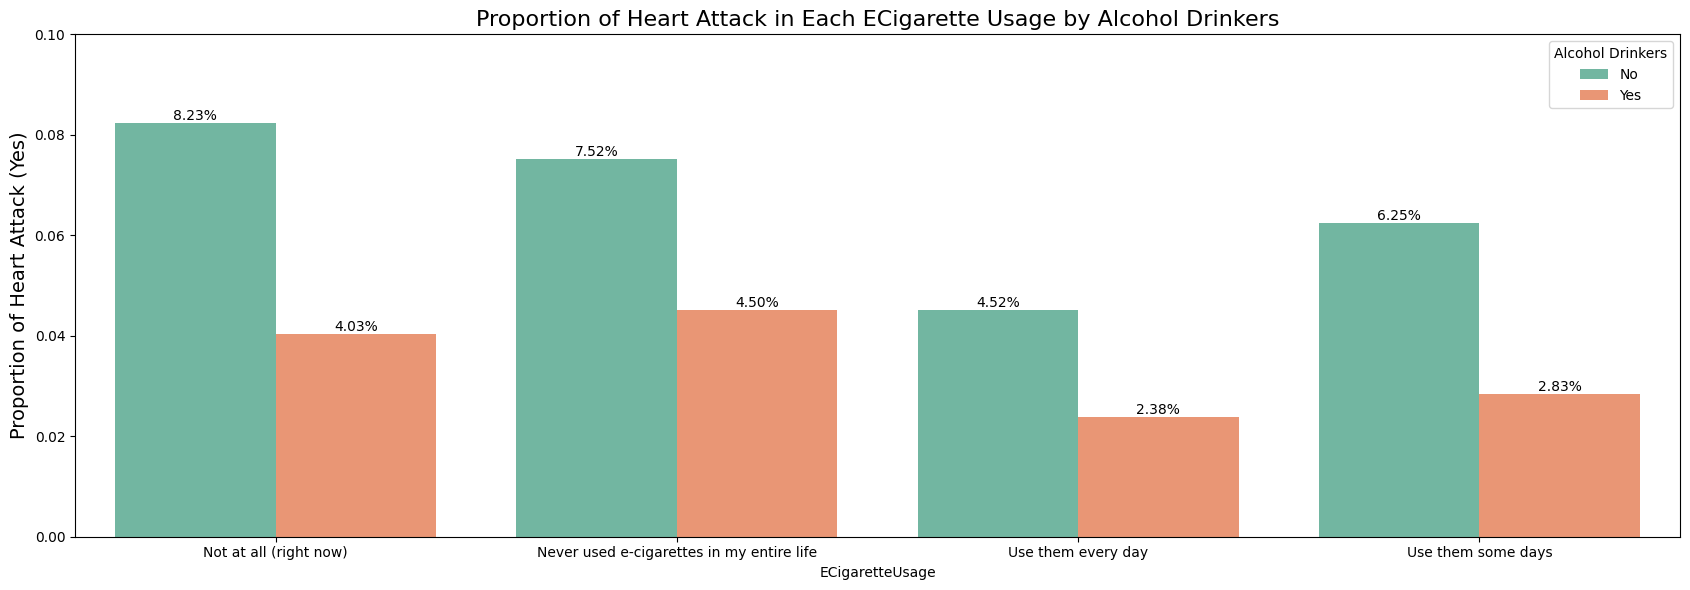

In [21]:
df['HeartAttackBinary'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='ECigaretteUsage',
    y='HeartAttackBinary',
    hue='AlcoholDrinkers',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each ECigarette Usage by Alcohol Drinkers', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Alcohol Drinkers')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

#### All the features results

In [24]:
for i in df.columns:
    if df[i].dtype == type(object):
        print(i, end=': ')
        print('\n', df[i].unique())
        print()


State: 
 ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']

Sex: 
 ['Female' 'Male']

GeneralHealth: 
 ['Very good' 'Excellent' 'Fair' 'Poor' 'Good']

LastCheckupTime: 
 ['Within past year (anytime less than 12 months ago)'
 'Within past 2 years (1 year but less than 2 years ago)'
 'Within past 5 years (2 years but less than 5 years ago)'
 '5 or more years ago']

PhysicalActivities: 
 ['No' 'Yes']

Remo

##### first we want to convert [yes, no] column data to numeric [1, 0] but there is data which mean Y/N but written with additional like [No,  borderline diabetes, Yes (during pregnancy)], so we will convert that into [yes, no] first

In [25]:
df.replace('No, borderline diabetes', 'No', inplace=True)
df.replace('Yes (during pregnancy)', 'Yes', inplace=True)

df["HadDiabetes"].value_counts()


No                                         367481
Yes                                         60559
No, pre-diabetes or borderline diabetes     10211
Yes, but only during pregnancy (female)      3816
Name: HadDiabetes, dtype: int64

## Checking missing values

<Axes: >

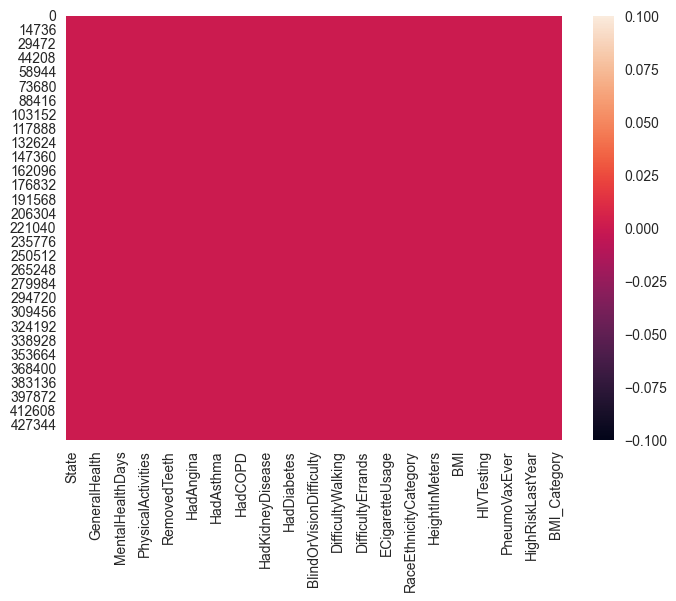

In [26]:
sns.heatmap(df.isnull())


## Outliers

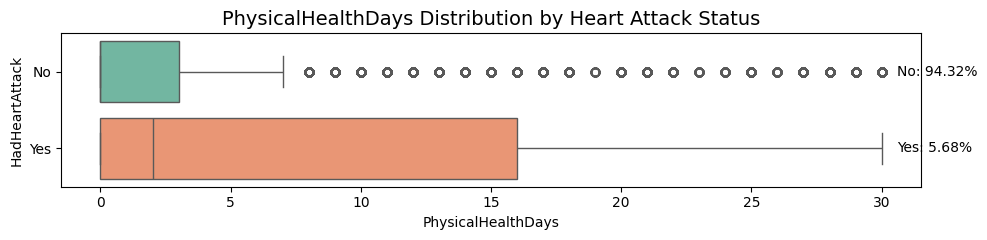

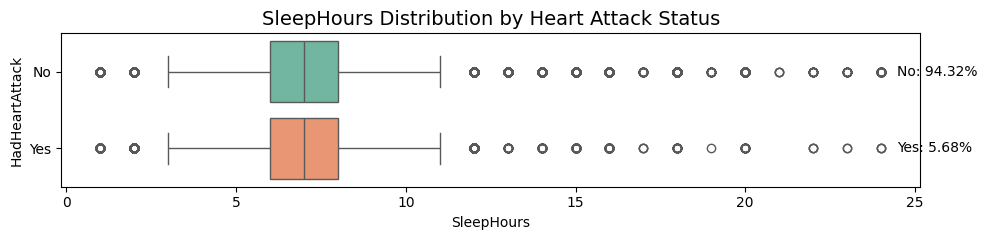

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 你要分析的特徵
features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

for feature in features:
    plt.figure(figsize=(10, 2.5), dpi=100)
    
    ax = sns.boxplot(
        data=df,
        x=feature,
        y='HadHeartAttack',
        orient='h',
        palette='Set2'
    )
    
    plt.title(f'{feature} Distribution by Heart Attack Status', fontsize=14)
    
    # 加上比例的計算
    counts = df['HadHeartAttack'].value_counts()
    total = counts.sum()
    
    labels = []
    for category in df['HadHeartAttack'].unique():
        if pd.isna(category):
            continue
        ratio = counts[category] / total * 100
        labels.append(f"{category}: {ratio:.2f}%")
    
    # 加上比例標籤
    for i, label in enumerate(labels):
        ax.text(
            df[feature].max()*1.02, i, label,
            verticalalignment='center',
            fontsize=10,
            color='black'
        )
    
    plt.tight_layout()
    plt.show()


## Encoding

In [28]:
col_obj = df.select_dtypes('object').columns


le = LabelEncoder()

for col in col_obj:
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442067 entries, 0 to 442066
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   State                      442067 non-null  int64   
 1   Sex                        442067 non-null  int64   
 2   GeneralHealth              442067 non-null  int64   
 3   PhysicalHealthDays         442067 non-null  float64 
 4   MentalHealthDays           442067 non-null  float64 
 5   LastCheckupTime            442067 non-null  int64   
 6   PhysicalActivities         442067 non-null  int64   
 7   SleepHours                 442067 non-null  float64 
 8   RemovedTeeth               442067 non-null  int64   
 9   HadHeartAttack             442067 non-null  int64   
 10  HadAngina                  442067 non-null  int64   
 11  HadStroke                  442067 non-null  int64   
 12  HadAsthma                  442067 non-null  int64   
 13  HadSkinCancer 

In [29]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos', 'BMI_Category'],
      dtype='object')

## Split Data

In [30]:
from sklearn.preprocessing import OneHotEncoder

# Separate features and target
X = df.drop(['HadHeartAttack'], axis=1)
Y = df['HadHeartAttack']

# One-hot encode categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Apply OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = ohe.fit_transform(X[categorical_cols])

# Combine numerical and encoded categorical
import numpy as np
X_combined = np.hstack([X[numerical_cols].values, X_encoded])

# Standard scale
sc = StandardScaler()
X_scaled = sc.fit_transform(X_combined)

print(X_scaled.shape, Y.shape, sep='\n')


(442067, 44)
(442067,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, stratify=Y, test_size=0.3, random_state=42)

In [32]:
print(X_train.shape, X_test.shape,y_train.shape,y_test.shape,sep='\n')

(309446, 44)
(132621, 44)
(309446,)
(132621,)


# Models Before Imbalance processing

In [33]:
from flaml import AutoML

automl = AutoML()
automl.fit(X_train=X_train, y_train=y_train, task="classification", time_budget=300)
print(automl.model)


[flaml.automl.logger: 04-26 18:56:17] {1728} INFO - task = classification
[flaml.automl.logger: 04-26 18:56:17] {1739} INFO - Evaluation method: holdout
[flaml.automl.logger: 04-26 18:56:17] {1838} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 04-26 18:56:17] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 04-26 18:56:17] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-26 18:56:17] {2393} INFO - Estimated sufficient time budget=10963s. Estimated necessary time budget=254s.
[flaml.automl.logger: 04-26 18:56:17] {2442} INFO -  at 0.3s,	estimator lgbm's best error=0.1492,	best estimator lgbm's best error=0.1492
[flaml.automl.logger: 04-26 18:56:17] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-26 18:56:17] {2442} INFO -  at 0.3s,	estimator lgbm's best error=0.1482,	best estimator lgbm's best error=0.1482
[flaml.automl.logger:

In [51]:
from sklearn.metrics import classification_report, f1_score

# Predict
y_pred = automl.predict(X_test)

# Print detailed classification report
print(classification_report(y_test, y_pred))

# Calculate overall F1-score (global, not per-class)
overall_f1 = f1_score(y_test, y_pred, average='weighted')  # weighted means considering support (number of samples)
print(f"\n⭐ Overall Weighted F1-Score: {overall_f1:.4f}")


              precision    recall  f1-score   support

           0       0.95      0.99      0.97    125089
           1       0.60      0.22      0.32      7532

    accuracy                           0.95    132621
   macro avg       0.78      0.60      0.65    132621
weighted avg       0.93      0.95      0.94    132621


⭐ Overall Weighted F1-Score: 0.9355


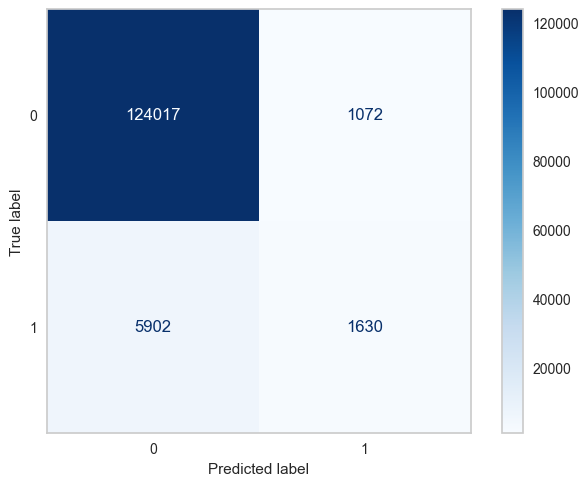

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.grid(None)
plt.show()


In [47]:
print("Best model:", automl.model)
print("Best model config:", automl.best_config)
print("Best loss:", automl.best_loss)


Best model: <flaml.automl.model.XGBoostSklearnEstimator object at 0x335e5b150>
Best model config: {'n_estimators': 686, 'max_leaves': 83, 'min_child_weight': 0.6989121867613257, 'learning_rate': 0.007627439357697208, 'subsample': 1.0, 'colsample_bylevel': 0.47363863850655374, 'colsample_bytree': 0.6868356522432121, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.19325018195709698}
Best loss: 0.10975468046514714


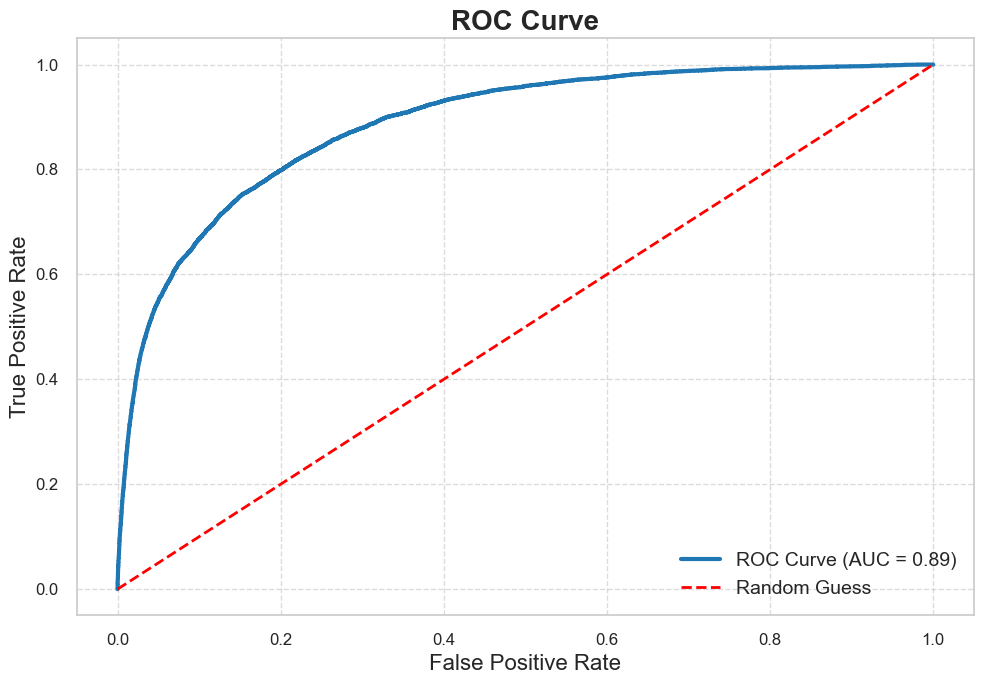

In [50]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = automl.predict_proba(X_test)[:, 1]

sns.set(style='whitegrid')

# calculate fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# plot
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='#1f77b4', lw=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')

# Titles and labels
plt.title('ROC Curve', fontsize=20, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# Ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Grid, legend, and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right', fontsize=14)
plt.tight_layout()

# Show plot
plt.show()

# The following is the unmodified code, but we can use it as a reference to modify

## We have common techniques for imbalanced data:


<b>1.Under Sample : </b>

> Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

>Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.



- <b> Some Functions to apply Undersampling :</b>

*  <a>1. Random Under-Sampling With Imblearn.</a>

> is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement.


In [ ]:
# Sampling Data
rUs = RandomUnderSampler(random_state=42)

rUs_x_train, rUs_y_train = rUs.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', rUs_x_train.shape, " -- ", rUs_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'RandomUnderSampler',rUs_x_train,rUs_y_train)

original dataset shape: (223856, 18)  --  (223856,)

Resample dataset shape (38322, 18)  --  (38322,)


----------------------------------------

 -------------------DT-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.71      0.82     87727

           1       0.20      0.79      0.32      8212



    accuracy                           0.71     95939

   macro avg       0.59      0.75      0.57     95939

weighted avg       0.91      0.71      0.78     95939




----------------------------------------

 -------------------KNN-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.96      0.69      0.80     87727

           1       0.18      0.72      0.28      8212



    accuracy                           0.69     95939

   macro avg       0.57      0.70      0.54     95939

weighted avg       0.90      0.69      0.76     95939




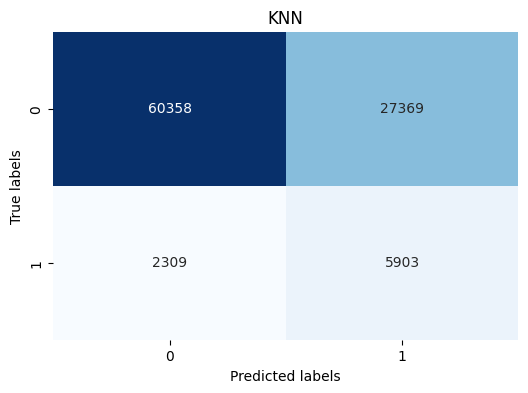

----------------------------------------

 -------------------RF-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.71      0.82     87727

           1       0.20      0.79      0.32      8212



    accuracy                           0.72     95939

   macro avg       0.59      0.75      0.57     95939

weighted avg       0.91      0.72      0.78     95939




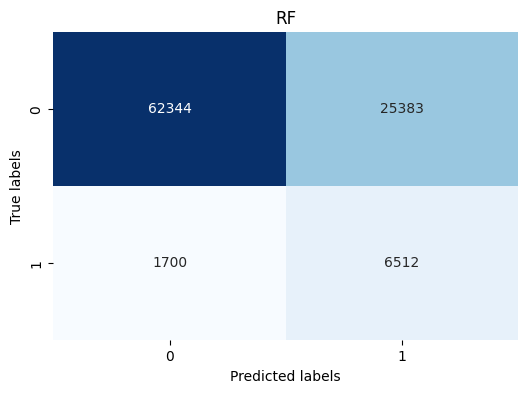

----------------------------------------

 -------------------SGD-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.71      0.82     87727

           1       0.20      0.77      0.32      8212



    accuracy                           0.72     95939

   macro avg       0.59      0.74      0.57     95939

weighted avg       0.90      0.72      0.78     95939




----------------------------------------

 -------------------XGB-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.72      0.83     87727

           1       0.21      0.80      0.34      8212



    accuracy                           0.73     95939

   macro avg       0.59      0.76      0.58     95939

weighted avg       0.91      0.73      0.79     95939




In [ ]:
test_models(rUs_x_train, X_test, rUs_y_train, y_test,'RandomUnderSampler')

-  <a >2. Tomeklinks .</a>

> Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.
Tomek’s link exists if the two samples are the nearest neighbors of each other.


In [ ]:
TL = TomekLinks(sampling_strategy='majority')

TL_x_train, TL_y_train = TL.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', TL_x_train.shape, " -- ", TL_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'TomekLinks',TL_x_train,TL_y_train)

original dataset shape: (223856, 18)  --  (223856,)

Resample dataset shape (216734, 18)  --  (216734,)


----------------------------------------

 -------------------DT-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.92      0.99      0.95     87727

           1       0.45      0.12      0.19      8212



    accuracy                           0.91     95939

   macro avg       0.69      0.55      0.57     95939

weighted avg       0.88      0.91      0.89     95939




----------------------------------------

 -------------------KNN-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.93      0.94      0.93     87727

           1       0.27      0.23      0.25      8212



    accuracy                           0.88     95939

   macro avg       0.60      0.58      0.59     95939

weighted avg       0.87      0.88      0.88     95939




----------------------------------------

 -------------------RF-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.92      0.98      0.95     87727

           1       0.46      0.14      0.22      8212



    accuracy                           0.91     95939

   macro avg       0.69      0.56      0.58     95939

weighted avg       0.88      0.91      0.89     95939




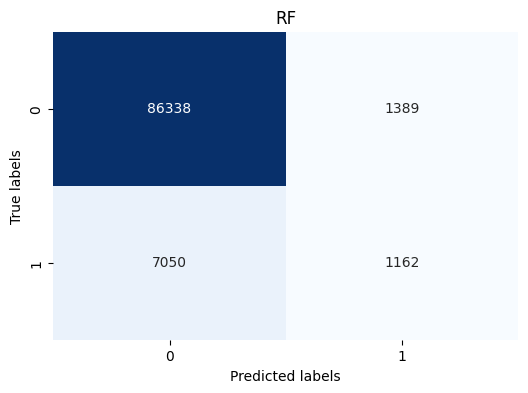

----------------------------------------

 -------------------SGD-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.92      0.99      0.95     87727

           1       0.48      0.13      0.20      8212



    accuracy                           0.91     95939

   macro avg       0.70      0.56      0.58     95939

weighted avg       0.89      0.91      0.89     95939




----------------------------------------

 -------------------XGB-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.92      0.99      0.95     87727

           1       0.50      0.14      0.21      8212



    accuracy                           0.91     95939

   macro avg       0.71      0.56      0.58     95939

weighted avg       0.89      0.91      0.89     95939




In [ ]:
test_models(TL_x_train, X_test, TL_y_train, y_test,'TomekLinks')


-  <a >3. NearMiss.</a>

> NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance will make the majority class equal to the minority class.

-  <a  >4. Balanced Class Weight.</a>


> The undersampling technique removes the majority class data points which results in data loss, whereas upsampling creates artificial data points of the minority class. During the training of machine learning, one can use class_weight parameter to handle the imbalance in the dataset.<br>
Scikit-learn comes with the class_weight parameters for all the machine learning algorithms.

-  <a >5. BalancedBaggingClassifier. </a>

>  When we try to use a usual classifier to classify an imbalanced dataset, the model favors the majority class due to its larger volume presence. A BalancedBaggingClassifier is the same as a sklearn classifier but with additional balancing. It includes an additional step to balance the training set at the time of fit for a given sampler. This classifier takes two special parameters “sampling_strategy” and “replacement”. The sampling_strategy decides the type of resampling required (e.g. ‘majority’ – resample only the majority class, ‘all’ – resample all classes, etc) and replacement decides whether it is going to be a sample with replacement or not.

-  <a  >6. ENN (Edited Nearest Neighbours).</a>
.....



<hr style='color:#696969 ;width:80%' >


<b>2.Over Sampling </b>


> Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.



- <b> Some Functions to apply Oversampling :</b>

-  <a >1. Random Over-Sampling With Imblearn.</a>

> One way to fight imbalanced data is to generate new samples in the minority classes. The most naive strategy is to generate new samples by random sampling with the replacement of the currently available samples.


In [ ]:
# Sampling Data
rOs = RandomOverSampler(random_state=42)

rOs_x_train, rOs_y_train = rOs.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', rOs_x_train.shape, " -- ", rOs_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'RandomOverSampler',rOs_x_train,rOs_y_train)

original dataset shape: (223856, 18)  --  (223856,)

Resample dataset shape (409390, 18)  --  (409390,)


----------------------------------------

 -------------------DT-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.72      0.83     87727

           1       0.21      0.78      0.33      8212



    accuracy                           0.73     95939

   macro avg       0.59      0.75      0.58     95939

weighted avg       0.91      0.73      0.79     95939




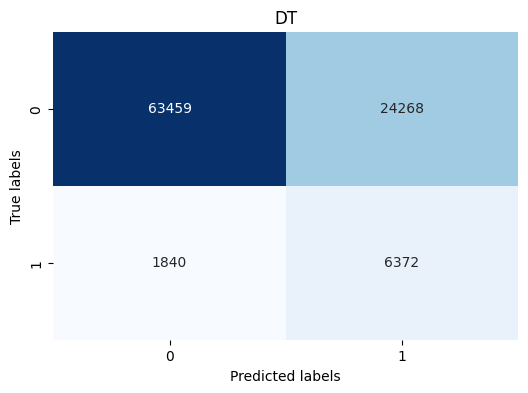

----------------------------------------

 -------------------KNN-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.94      0.89      0.91     87727

           1       0.22      0.35      0.27      8212



    accuracy                           0.84     95939

   macro avg       0.58      0.62      0.59     95939

weighted avg       0.88      0.84      0.86     95939




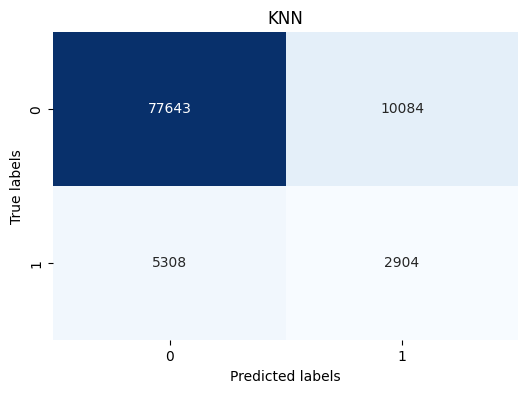

----------------------------------------

 -------------------RF-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.95      0.87      0.90     87727

           1       0.26      0.49      0.34      8212



    accuracy                           0.83     95939

   macro avg       0.60      0.68      0.62     95939

weighted avg       0.89      0.83      0.86     95939




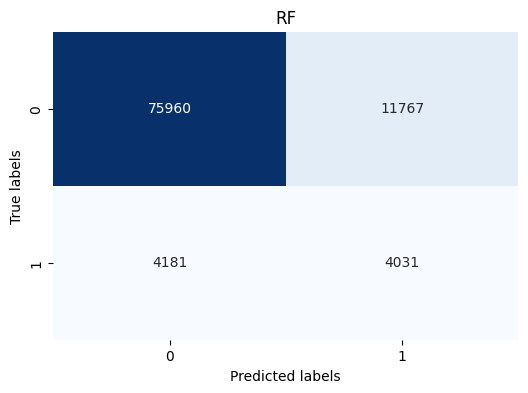

----------------------------------------

 -------------------SGD-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.74      0.84     87727

           1       0.21      0.76      0.33      8212



    accuracy                           0.74     95939

   macro avg       0.59      0.75      0.59     95939

weighted avg       0.91      0.74      0.79     95939




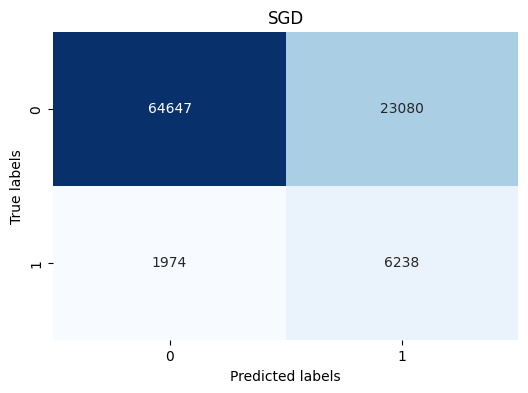

----------------------------------------

 -------------------XGB-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.75      0.84     87727

           1       0.22      0.77      0.34      8212



    accuracy                           0.75     95939

   macro avg       0.60      0.76      0.59     95939

weighted avg       0.91      0.75      0.80     95939




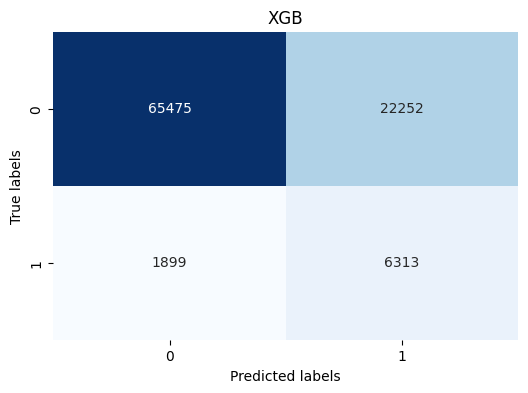

In [ ]:
test_models(rOs_x_train, X_test, rOs_y_train, y_test,'RandomOverSampler')


-  <a >2. Synthetic Minority Oversampling Technique (SMOTE) </a>

> This technique generates synthetic data for the minority class.
SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
test_models(smote_x_train, X_test, smote_y_train, y_test,'SMOTE')

In [ ]:
smote= SMOTE()

smote_x_train, smote_y_train = smote.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', smote_x_train.shape, " -- ", smote_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'SMOTE',smote_x_train,smote_y_train)

original dataset shape: (223856, 18)  --  (223856,)

Resample dataset shape (409390, 18)  --  (409390,)


----------------------------------------

 -------------------DT-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.95      0.88      0.91     87727

           1       0.27      0.47      0.35      8212



    accuracy                           0.85     95939

   macro avg       0.61      0.68      0.63     95939

weighted avg       0.89      0.85      0.86     95939




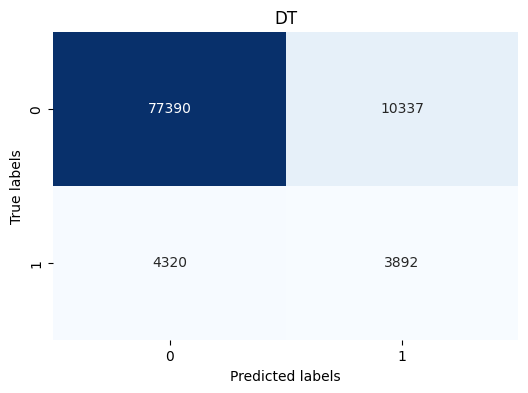

----------------------------------------

 -------------------KNN-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.94      0.87      0.91     87727

           1       0.22      0.38      0.28      8212



    accuracy                           0.83     95939

   macro avg       0.58      0.63      0.59     95939

weighted avg       0.88      0.83      0.85     95939




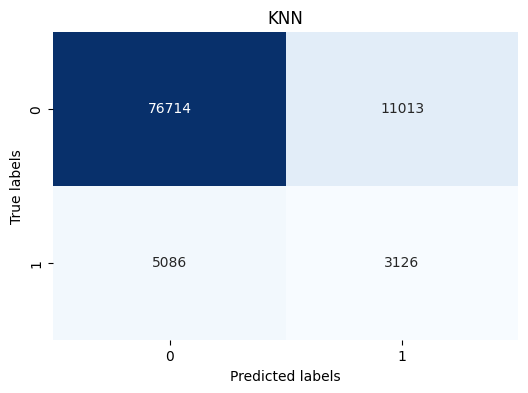

----------------------------------------

 -------------------RF-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.94      0.93      0.94     87727

           1       0.32      0.33      0.33      8212



    accuracy                           0.88     95939

   macro avg       0.63      0.63      0.63     95939

weighted avg       0.89      0.88      0.88     95939




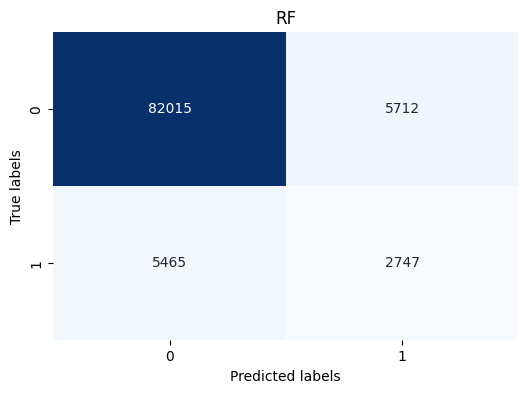

----------------------------------------

 -------------------SGD-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.74      0.84     87727

           1       0.21      0.75      0.33      8212



    accuracy                           0.74     95939

   macro avg       0.59      0.75      0.59     95939

weighted avg       0.90      0.74      0.80     95939




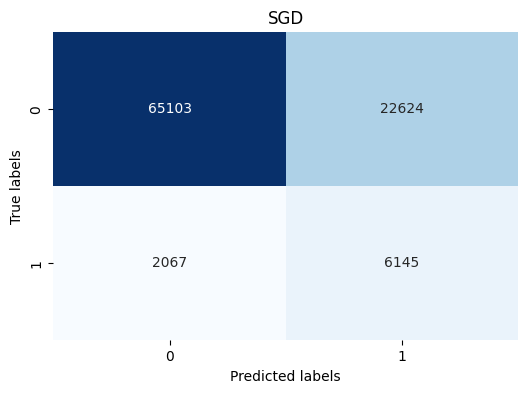

----------------------------------------

 -------------------XGB-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.93      0.97      0.95     87727

           1       0.37      0.18      0.24      8212



    accuracy                           0.90     95939

   macro avg       0.65      0.58      0.60     95939

weighted avg       0.88      0.90      0.89     95939




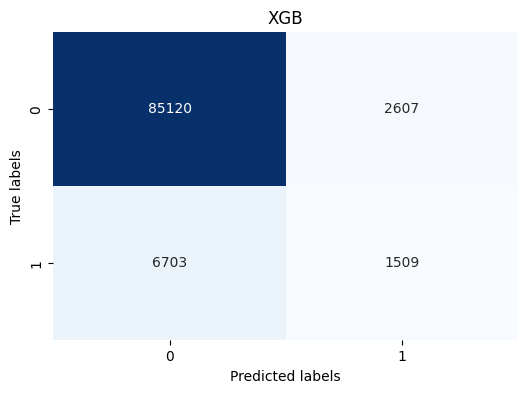

In [ ]:
test_models(smote_x_train, X_test, smote_y_train, y_test,'SMOTE')

<hr style='color:#696969 ;width:80%' >


<b>3.Combine Oversampling and Undersampling Techniques.</b>

>Undersampling techniques is not recommended as it removes the majority class data points. Oversampling techniques are often considered better than undersampling techniques. The idea is to combine the undersampling and oversampling techniques to create a robust balanced dataset fit for model training.
The idea is to first use an oversampling technique to create duplicate and artificial data points and use undersampling techniques to remove noise or unnecessary generated data points.

>Imblearn library comes with the implementation of combined Oversampling and Undersampling techniques such as:<br>
• <b style='color:#A52A2A'>Smote-Tomek</b>: Smote (Oversampler) combined with TomekLinks (Undersampler).<br>
• Smote-ENN: Smote (Oversampler) combined with ENN (Undersampler).<br>

### Smote-Tomek :

In [ ]:
smt = SMOTETomek(random_state=42)

smt_x_train, smt_y_train = smt.fit_resample(X_train, y_train)

print('original dataset shape:', X_train.shape, " -- ", y_train.shape)
print('Resample dataset shape', smt_x_train.shape, " -- ", smt_y_train.shape)

GeneratHistory_List(df,X_train,X_test,'SMOTETomek',smt_x_train,smt_y_train)

original dataset shape: (223856, 18)  --  (223856,)

Resample dataset shape (402800, 18)  --  (402800,)


----------------------------------------

 -------------------DT-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.95      0.87      0.91     87727

           1       0.27      0.49      0.35      8212



    accuracy                           0.84     95939

   macro avg       0.61      0.68      0.63     95939

weighted avg       0.89      0.84      0.86     95939




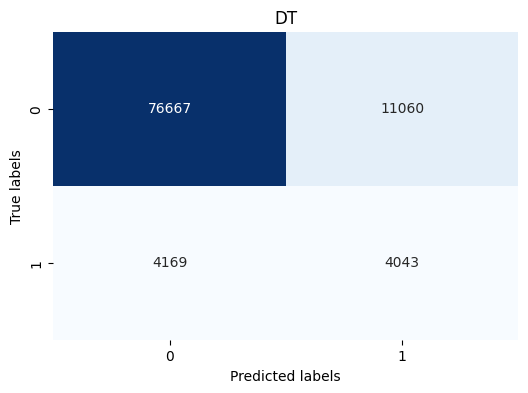

----------------------------------------

 -------------------KNN-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.94      0.87      0.90     87727

           1       0.22      0.38      0.28      8212



    accuracy                           0.83     95939

   macro avg       0.58      0.63      0.59     95939

weighted avg       0.88      0.83      0.85     95939




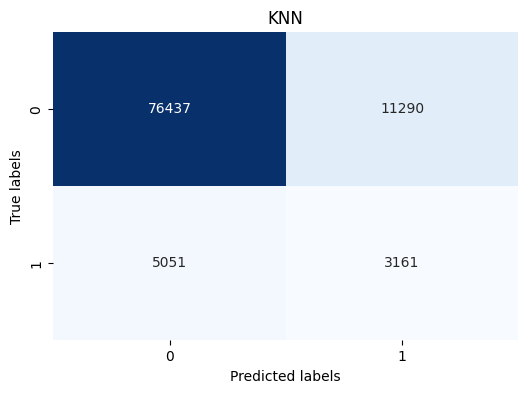

----------------------------------------

 -------------------RF-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.94      0.93      0.94     87727

           1       0.32      0.34      0.33      8212



    accuracy                           0.88     95939

   macro avg       0.63      0.63      0.63     95939

weighted avg       0.88      0.88      0.88     95939




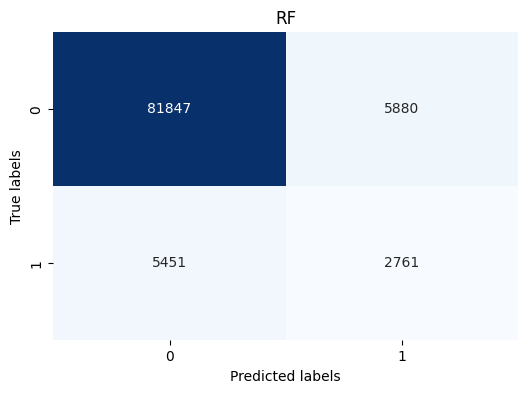

----------------------------------------

 -------------------SGD-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.97      0.72      0.83     87727

           1       0.21      0.78      0.33      8212



    accuracy                           0.72     95939

   macro avg       0.59      0.75      0.58     95939

weighted avg       0.91      0.72      0.78     95939




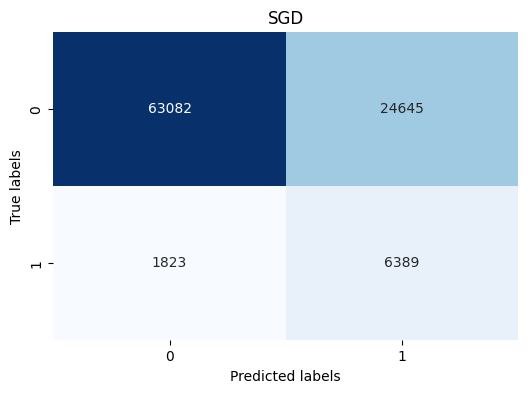

----------------------------------------

 -------------------XGB-------------------

----------------------------------------

              precision    recall  f1-score   support



           0       0.93      0.97      0.95     87727

           1       0.37      0.20      0.26      8212



    accuracy                           0.90     95939

   macro avg       0.65      0.58      0.60     95939

weighted avg       0.88      0.90      0.89     95939




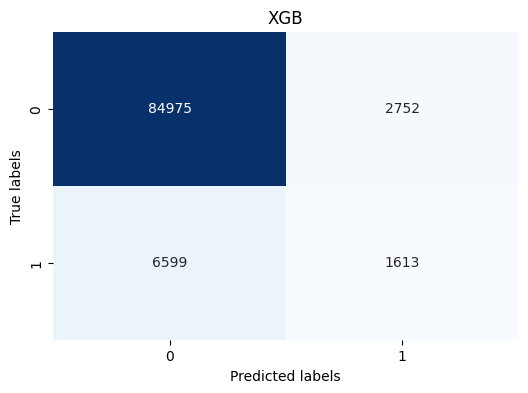

In [ ]:
test_models(smt_x_train, X_test, smt_y_train, y_test,'SMOTETomek')

<hr>
<hr>

In [ ]:


DataShape_summary = pd.DataFrame(DataShapeHistory_list,columns=['Technique Name','Method Name','X-DataRaw','X_train-DataRaw','Y_train-DataRaw'
, 'X_train-DataSampling','Y_train-DataSampling'])


In [ ]:
DataShape_summary.drop([0,1,2])


Empty DataFrame
Columns: [Technique Name, Method Name, X-DataRaw, X_train-DataRaw, Y_train-DataRaw, X_train-DataSampling, Y_train-DataSampling]
Index: []

In [ ]:

DataShape_summary

Technique Name         Method Name  X-DataRaw  \
0                      Under Sampling  RandomUnderSampler     319795   
1                      Under Sampling          TomekLinks     319795   
2                       Over Sampling   RandomOverSampler     319795   
3   Combined Over and Under Sampling           SMOTETomek     319795   

   X_train-DataRaw  Y_train-DataRaw  X_train-DataSampling  \
0           223856            95939                 38322   
1           223856            95939                216734   
2           223856            95939                409390   
3           223856            95939                402800   

   Y_train-DataSampling  
0                 38322  
1                216734  
2                409390  
3                402800

In [ ]:
MODELS_RESULTS

Model        Sampling By   Train Score  Test Score  Recall  Precision  \
0     DT     Before Sampling        0.918       0.914    6.00      46.82   
1    KNN     Before Sampling        0.997       0.889   17.75      27.44   
2     RF     Before Sampling        0.963       0.914    9.55      48.04   
3    SGD     Before Sampling        0.915       0.915    9.71      51.82   
4    XGB     Before Sampling        0.923       0.915    9.55      52.55   
5     DT  RandomUnderSampler        0.777       0.713   79.34      20.15   
6    KNN  RandomUnderSampler        0.997       0.691   71.88      17.74   
7     RF  RandomUnderSampler        0.949       0.718   79.30      20.42   
8    SGD  RandomUnderSampler        0.743       0.717   76.84      20.00   
9    XGB  RandomUnderSampler        0.815       0.729   79.86      21.24   
10    DT          TomekLinks        0.918       0.912   12.02      44.78   
11   KNN          TomekLinks        0.997       0.880   22.82      26.53   
12    RF          TomekLinks        0.965       0.912   14.15      45.55   
13   SGD          TomekLinks        0.913       0.913   12.76      47.53   
14   XGB          TomekLinks        0.923       0.914   13.70      49.58   
15    DT   RandomOverSampler        0.772       0.728   77.59      20.80   
16   KNN   RandomOverSampler        0.993       0.840   35.36      22.36   
17    RF   RandomOverSampler        0.931       0.834   49.09      25.52   
18   SGD   RandomOverSampler        0.751       0.739   75.96      21.28   
19   XGB   RandomOverSampler        0.800       0.748   76.88      22.10   
20    DT          SMOTETomek        0.874       0.841   49.23      26.77   
21   KNN          SMOTETomek        0.998       0.830   38.49      21.87   
22    RF          SMOTETomek        0.961       0.882   33.62      31.95   
23   SGD          SMOTETomek        0.762       0.724   77.80      20.59   
24   XGB          SMOTETomek        0.940       0.903   19.64      36.95   

    f1-score                              classification_report  
0      10.64                precision    recall  f1-score   ...  
1      21.56                precision    recall  f1-score   ...  
2      15.93                precision    recall  f1-score   ...  
3      16.35                precision    recall  f1-score   ...  
4      16.16                precision    recall  f1-score   ...  
5      32.13                precision    recall  f1-score   ...  
6      28.46                precision    recall  f1-score   ...  
7      32.47                precision    recall  f1-score   ...  
8      31.74                precision    recall  f1-score   ...  
9      33.56                precision    recall  f1-score   ...  
10     18.95                precision    recall  f1-score   ...  
11     24.54                precision    recall  f1-score   ...  
12     21.59                precision    recall  f1-score   ...  
13     20.12                precision    recall  f1-score   ...  
14     21.47                precision    recall  f1-score   ...  
15     32.80                precision    recall  f1-score   ...  
16     27.40                precision    recall  f1-score   ...  
17     33.58                precision    recall  f1-score   ...  
18     33.24                precision    recall  f1-score   ...  
19     34.33                precision    recall  f1-score   ...  
20     34.68                precision    recall  f1-score   ...  
21     27.90                precision    recall  f1-score   ...  
22     32.77                precision    recall  f1-score   ...  
23     32.56                precision    recall  f1-score   ...  
24     25.65                precision    recall  f1-score   ...